# ------------------ EDA & Feature Engineering -----------------------

### Importing Libraries

In [270]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',None)
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### Importing Dataset

In [271]:
name_path = r'allbp_names.csv'
data_path = r'allbp_data.csv'
test_path = r'allbp_test.csv'

In [272]:
name_df = pd.read_csv(name_path,skiprows=9,on_bad_lines='skip')
name_df.head()

,age:\t\t\t\tcontinuous.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,age:\t\t\t\tcontinuous.,NaN,NaN,NaN,NaN,NaN
1,sex:\t\t\t\tM,F.,NaN,NaN,NaN,NaN
2,on thyroxine:\t\t\tf,t.,NaN,NaN,NaN,NaN
3,query on thyroxine:\t\tf,t.,NaN,NaN,NaN,NaN
4,on antithyroid medication:\tf,t.,NaN,NaN,NaN,NaN


In [273]:
name_df.dropna(axis=1,how='any',inplace=True)

In [274]:
name_df.head(2)

,age:\t\t\t\tcontinuous.
0,age:\t\t\t\tcontinuous.
1,sex:\t\t\t\tM


In [275]:
name_df.rename(columns={"age:\t\t\t\tcontinuous.":"Name"},inplace=True)

In [276]:
name_df.head(2)

,Name
0,age:\t\t\t\tcontinuous.
1,sex:\t\t\t\tM


In [277]:
Column_name =[i[0] for i in name_df['Name'].str.split(':')]
              

In [278]:
Column_name

['age',
 'sex',
 'on thyroxine',
 'query on thyroxine',
 'on antithyroid medication',
 'sick',
 'pregnant',
 'thyroid surgery',
 'I131 treatment',
 'query hypothyroid',
 'query hyperthyroid',
 'lithium',
 'goitre',
 'tumor',
 'hypopituitary',
 'psych',
 'TSH measured',
 'TSH',
 'T3 measured',
 'T3',
 'TT4 measured',
 'TT4',
 'T4U measured',
 'T4U',
 'FTI measured',
 'FTI',
 'TBG measured',
 'TBG',
 'referral source']

In [279]:
Column_name.append('Classes')


In [280]:
len(Column_name)

30

In [281]:
data_df = pd.read_csv(data_path,names=Column_name)
data_df.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,query hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH measured,TSH,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,Classes
0,41,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,1.3,t,2.5,t,125,t,1.14,t,109,f,?,SVHC,negative.|3733
1,23,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,4.1,t,2,t,102,f,?,f,?,f,?,other,negative.|1442
2,46,M,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.98,f,?,t,109,t,0.91,t,120,f,?,other,negative.|2965
3,70,F,t,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.16,t,1.9,t,175,f,?,f,?,f,?,other,negative.|806
4,70,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.72,t,1.2,t,61,t,0.87,t,70,f,?,SVI,negative.|2807


In [282]:
data_df.shape

(2800, 30)

In [283]:
test_df = pd.read_csv(test_path,names=Column_name,index_col=False)
test_df.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,query hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH measured,TSH,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,Classes
0,35,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,?,f,?,f,?,f,?,f,?,f,?,other,negative.|219
1,63,M,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,3.5,t,2.5,t,108,t,0.96,t,113,f,?,SVI,negative.|2059
2,25,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,4.6,t,2.4,t,61,t,0.82,t,75,f,?,SVHD,negative.|399
3,53,F,f,f,f,f,f,f,f,t,f,f,f,f,f,f,t,0.25,t,2.1,t,145,t,1.03,t,141,f,?,other,negative.|1911
4,92,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.7,t,1.3,t,120,t,0.84,t,143,f,?,SVI,negative.|487


In [284]:
test_df.shape

(972, 30)

In [285]:
data = pd.concat([data_df,test_df],ignore_index=True)

In [286]:
data.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,query hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH measured,TSH,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,Classes
0,41,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,1.3,t,2.5,t,125,t,1.14,t,109,f,?,SVHC,negative.|3733
1,23,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,4.1,t,2,t,102,f,?,f,?,f,?,other,negative.|1442
2,46,M,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.98,f,?,t,109,t,0.91,t,120,f,?,other,negative.|2965
3,70,F,t,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.16,t,1.9,t,175,f,?,f,?,f,?,other,negative.|806
4,70,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.72,t,1.2,t,61,t,0.87,t,70,f,?,SVI,negative.|2807


# EDA

In [287]:
#data = pd.read_csv("https://raw.githubusercontent.com/sahdevsaini/Data-Set/main/allrep.data",header = None)

In [288]:
data.columns

Index(['age', 'sex', 'on thyroxine', 'query on thyroxine',
       'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery',
       'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH measured', 'TSH',
       'T3 measured', 'T3', 'TT4 measured', 'TT4', 'T4U measured', 'T4U',
       'FTI measured', 'FTI', 'TBG measured', 'TBG', 'referral source',
       'Classes'],
      dtype='object')

In [289]:
data.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,query hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH measured,TSH,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,Classes
0,41,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,1.3,t,2.5,t,125,t,1.14,t,109,f,?,SVHC,negative.|3733
1,23,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,4.1,t,2,t,102,f,?,f,?,f,?,other,negative.|1442
2,46,M,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.98,f,?,t,109,t,0.91,t,120,f,?,other,negative.|2965
3,70,F,t,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.16,t,1.9,t,175,f,?,f,?,f,?,other,negative.|806
4,70,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.72,t,1.2,t,61,t,0.87,t,70,f,?,SVI,negative.|2807


In [290]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        3772 non-null   object
 1   sex                        3772 non-null   object
 2   on thyroxine               3772 non-null   object
 3   query on thyroxine         3772 non-null   object
 4   on antithyroid medication  3772 non-null   object
 5   sick                       3772 non-null   object
 6   pregnant                   3772 non-null   object
 7   thyroid surgery            3772 non-null   object
 8   I131 treatment             3772 non-null   object
 9   query hypothyroid          3772 non-null   object
 10  query hyperthyroid         3772 non-null   object
 11  lithium                    3772 non-null   object
 12  goitre                     3772 non-null   object
 13  tumor                      3772 non-null   object
 14  hypopitu

```python
Since the name of column is not given, lets take them form the allrep.data.
```

### Description of Attribute
**Problem Statement** : To build a classification methodology to predict the type of Thyroid a person has replacement therapy, underreplacement, overreplacement,
negative.

```python
age - Age of the person

sex - Male or Female

on_thyroxine - true or false

on_antithyroid_medication - true or false

sick - true or false

pregnant - true or false

thyroid_surgery - true or false

I131_treatment - true or false

query_hypothyroid - true or false

query_hyperthyroid -true or false

lithium - true or false

goitre - true or false

tumor - true or false

hypopituitary- true or false

psych - true or false

TSH_measured - true or false

TSH - thyroid stimulating hormone floating value

T3_measured - true or false

T3 - triiodothyronine value

TT4_measured- true or false

TT4 - Thyroxine value

T4U_measured- true or false

T4U - numerical value

FTI_measured- true or false

FTI -Free Thyroxine Index

TBG_measured- true or false

TBG -Thyroid-Binding Globulin value

referral_source - different sources of referals

Class - replacement therapy, underreplacement, overreplacement,
negative.	
```

In [136]:
len(data)

3772

In [137]:
data.shape

(3772, 30)

In [138]:
# checking '?' or null value in 'age'

print('No. of null value in Age :',data[data['age'] =='?']['age'].count())

No. of null value in Age : 1


In [139]:
# checking '?' or null value in 'sex'

print('No. of null value in Sex :',data[data['sex'] =='?']['sex'].count())

No. of null value in Sex : 150


### Replace '?' with NaN

In [140]:

data =data.apply(lambda x : x.replace('?',np.nan))

### Checking for Null Values in the Dataset

In [143]:
data.isna().sum()

age                             1
sex                           150
on thyroxine                    0
query on thyroxine              0
on antithyroid medication       0
sick                            0
pregnant                        0
thyroid surgery                 0
I131 treatment                  0
query hypothyroid               0
query hyperthyroid              0
lithium                         0
goitre                          0
tumor                           0
hypopituitary                   0
psych                           0
TSH measured                    0
TSH                           369
T3 measured                     0
T3                            769
TT4 measured                    0
TT4                           231
T4U measured                    0
T4U                           387
FTI measured                    0
FTI                           385
TBG measured                    0
TBG                          3772
referral source                 0
Classes       

**Observation:** No null values.

### Type of data in every Attribute in the Dataset

In [144]:
data.dtypes

age                           object
sex                           object
on thyroxine                  object
query on thyroxine            object
on antithyroid medication     object
sick                          object
pregnant                      object
thyroid surgery               object
I131 treatment                object
query hypothyroid             object
query hyperthyroid            object
lithium                       object
goitre                        object
tumor                         object
hypopituitary                 object
psych                         object
TSH measured                  object
TSH                           object
T3 measured                   object
T3                            object
TT4 measured                  object
TT4                           object
T4U measured                  object
T4U                           object
FTI measured                  object
FTI                           object
TBG measured                  object
T

**Observation**
Numerical Attribute are also in Object form

In [145]:
# for unique type of data in Every Attribute
for i in data.columns:
  print('*******************************')
  print(f'The unique value of column {i} are {data[i].unique()}')

*******************************
The unique value of column age are ['41' '23' '46' '70' '18' '59' '80' '66' '68' '84' '67' '71' '28' '65'
 '42' '63' '51' '81' '54' '55' '60' '25' '73' '34' '78' '37' '85' '26'
 '58' '64' '44' '48' '61' '35' '83' '21' '87' '53' '77' '27' '69' '74'
 '38' '76' '45' '36' '22' '43' '72' '82' '31' '39' '49' '62' '57' '1' '50'
 '30' '29' '75' '19' '7' '79' '17' '24' '15' '32' '47' '16' '52' '33' '13'
 '10' '89' '56' '20' '90' '40' '88' '14' '86' '94' '12' '4' '11' '8' '5'
 '455' '2' '91' '6' nan '93' '92' 35 63 25 53 92 67 60 48 27 73 19 72 16
 54 39 38 33 45 21 51 64 40 71 49 79 20 59 37 42 46 50 69 30 31 89 77 68
 65 24 75 80 23 11 18 62 76 22 70 47 56 26 28 83 74 78 58 61 55 41 85 86
 32 43 17 57 66 34 14 52 93 36 81 84 15 12 44 29 82 87 88 7]
*******************************
The unique value of column sex are ['F' 'M' nan]
*******************************
The unique value of column on thyroxine are ['f' 't']
*******************************
The unique value o

**Observation**
1. Missing Values are '?' format.
2. Class has member id as well.
3. TBG_Measured and TBG column has a single value.

# Feature Engineering

#### Drop referral source column and 'TBG measured' carry 0 in all 'TBG' as  carry Null 

In [146]:
data.drop(columns=['referral source','TBG measured', 'TBG'],inplace=True)

In [147]:
data.columns

Index(['age', 'sex', 'on thyroxine', 'query on thyroxine',
       'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery',
       'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH measured', 'TSH',
       'T3 measured', 'T3', 'TT4 measured', 'TT4', 'T4U measured', 'T4U',
       'FTI measured', 'FTI', 'Classes'],
      dtype='object')

#### Numeric Feature list

In [148]:
num_col = ['age','TSH','T3','TT4','T4U','FTI']
len(num_col)

6

#### Categorical Feature list

In [149]:
cat_col = [col for col in data.columns if col not in num_col]
len(cat_col)

21

#### need to clean the  data

In [217]:
data[['Classes']].head()

,Classes
0,negative.|3733
1,negative.|1442
2,negative.|2965
3,negative.|806
4,negative.|2807


#### Cleaning the classes Attribute of Dataset

In [152]:
data['Classes'] = data['Classes'].apply(lambda x : x[:x.find(".")])

In [153]:
data['Classes'].value_counts()

negative                     3609
increased binding protein     149
decreased binding protein      14
Name: Classes, dtype: int64

In [154]:
data = data.apply(lambda x : x.replace('?','0'))

In [155]:
data.head(2)

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,query hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH measured,TSH,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,Classes
0,41,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,1.3,t,2.5,t,125,t,1.14,t,109,negative
1,23,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,4.1,t,2,t,102,f,NaN,f,NaN,negative


In [156]:
# changing Value Name in Classes

data['Classes']= data['Classes'].map({'negative':'Negative','increased binding protein':'Hypothyroidism','decreased binding protein':'Hyperthyroidism'})

In [218]:
data['Classes'].value_counts()

Negative           3609
Hypothyroidism      149
Hyperthyroidism      14
Name: Classes, dtype: int64

In [219]:
group_by_value = data.groupby('Classes').size()

<AxesSubplot: xlabel='Classes'>

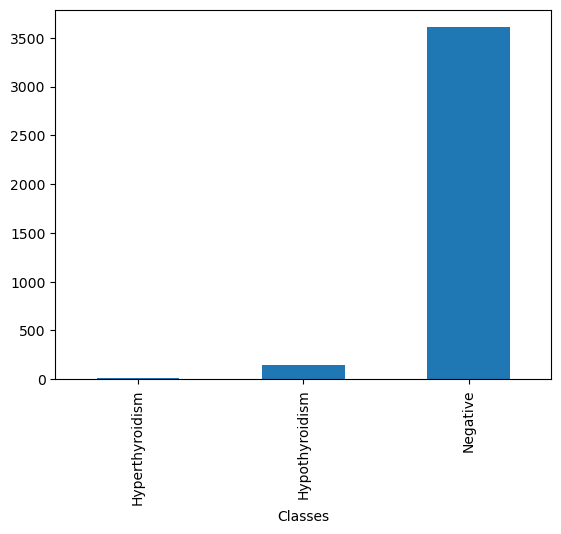

In [220]:
group_by_value.plot(kind='bar')

**Observation**:<br> Data are imbalanced.

In [17]:
data.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,query hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH measured,TSH,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,Classes
0,41,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,1.3,t,2.5,t,125,t,1.14,t,109,Negative
1,23,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,4.1,t,2,t,102,f,NaN,f,NaN,Negative
2,46,M,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.98,f,NaN,t,109,t,0.91,t,120,Negative
3,70,F,t,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.16,t,1.9,t,175,f,NaN,f,NaN,Negative
4,70,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.72,t,1.2,t,61,t,0.87,t,70,Negative


In [221]:
data[num_col].head()

,age,TSH,T3,TT4,T4U,FTI
0,41,1.3,2.5,125,1.14,109
1,23,4.1,2,102,NaN,NaN
2,46,0.98,NaN,109,0.91,120
3,70,0.16,1.9,175,NaN,NaN
4,70,0.72,1.2,61,0.87,70


In [165]:
data.describe()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,query hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH measured,TSH,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,Classes
count,3771,3622,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3403,3772,3003,3772,3541,3772,3385,3772,3387,3772
unique,174,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,287,2,69,2,241,2,146,2,234,3
top,59,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.2,t,2,t,101,t,0.99,t,100,Negative
freq,75,2480,3308,3722,3729,3625,3719,3719,3713,3538,3535,3754,3738,3676,3771,3588,3403,116,3003,238,3541,71,3385,95,3387,73,3609


#### Cheacking Null Values in Numerical Features

In [361]:
 data[num_col].isna().sum()

age      1
TSH    369
T3     769
TT4    231
T4U    387
FTI    385
dtype: int64

In [171]:
len(data)

3772

In [226]:
data['sex'].value_counts()

# Female has more count than Male

F    2480
M    1142
Name: sex, dtype: int64

#### Female  has the age Null value so Fill Null with Female Mean Value

In [362]:
data[data['age'].isna()==True]

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,query hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH measured,TSH,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,Classes
1985,NaN,F,t,f,f,f,f,f,t,f,f,f,f,f,f,f,t,0.6,t,1.5,t,120,t,0.82,t,146,Negative


In [365]:
female_age_mean = round(data[data['sex']=='F']['age'].median())
data['age'] = data['age'].fillna(female_age_mean)

In [366]:
data['age'].isna().sum()

0

### Cheacking Null values in Categorical Features

In [367]:
data[cat_col].isna().sum()

sex                          0
on thyroxine                 0
query on thyroxine           0
on antithyroid medication    0
sick                         0
pregnant                     0
thyroid surgery              0
I131 treatment               0
query hypothyroid            0
query hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH measured                 0
T3 measured                  0
TT4 measured                 0
T4U measured                 0
FTI measured                 0
Classes                      0
dtype: int64

In [368]:
data[data['sex'].isna()==True]

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,query hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH measured,TSH,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,Classes


#### Fill sex null value with most frequent (mode)

In [369]:
from sklearn.impute import SimpleImputer

imputer_mode = SimpleImputer(strategy='most_frequent')
data[['sex']] = imputer_mode.fit_transform(data[['sex']])

In [370]:
data['sex'].isna().sum()

0

In [371]:
data['sex'].value_counts()

F    2630
M    1142
Name: sex, dtype: int64

In [372]:
# Checking Null Values
data[num_col].isna().sum()

age      0
TSH    369
T3     769
TT4    231
T4U    387
FTI    385
dtype: int64

In [375]:
for i in num_col:
    data[i].fillna(data[i].median(),inplace = True)

In [376]:
# Checking Null Values
data[num_col].isna().sum()

age    0
TSH    0
T3     0
TT4    0
T4U    0
FTI    0
dtype: int64

In [373]:
num_col

['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']

In [374]:
data[num_col].dtypes

age    object
TSH    object
T3     object
TT4    object
T4U    object
FTI    object
dtype: object

#### need to change age data type float64 to int64

In [377]:
# change datatype

#data[['age']]=data[['age']].astype('int64')

In [381]:
for col in num_col:
    data[col] = pd.to_numeric(data[col], errors='coerce')

In [382]:
data.dtypes

age                            int64
sex                           object
on thyroxine                  object
query on thyroxine            object
on antithyroid medication     object
sick                          object
pregnant                      object
thyroid surgery               object
I131 treatment                object
query hypothyroid             object
query hyperthyroid            object
lithium                       object
goitre                        object
tumor                         object
hypopituitary                 object
psych                         object
TSH measured                  object
TSH                          float64
T3 measured                   object
T3                           float64
TT4 measured                  object
TT4                          float64
T4U measured                  object
T4U                          float64
FTI measured                  object
FTI                          float64
Classes                       object
d

In [383]:
# Final data Type Check in numeric feature
data[num_col].dtypes

age      int64
TSH    float64
T3     float64
TT4    float64
T4U    float64
FTI    float64
dtype: object

In [384]:
# Final data Type Check in Caterigocal feature
data[cat_col].dtypes

sex                          object
on thyroxine                 object
query on thyroxine           object
on antithyroid medication    object
sick                         object
pregnant                     object
thyroid surgery              object
I131 treatment               object
query hypothyroid            object
query hyperthyroid           object
lithium                      object
goitre                       object
tumor                        object
hypopituitary                object
psych                        object
TSH measured                 object
T3 measured                  object
TT4 measured                 object
T4U measured                 object
FTI measured                 object
Classes                      object
dtype: object

In [385]:
data.head(15)

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,query hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH measured,TSH,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,Classes
0,41,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,1.30,t,2.5,t,125.0,t,1.14,t,109.0,Negative
1,23,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,4.10,t,2.0,t,102.0,f,0.98,f,107.0,Negative
2,46,M,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.98,f,2.0,t,109.0,t,0.91,t,120.0,Negative
3,70,F,t,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.16,t,1.9,t,175.0,f,0.98,f,107.0,Negative
4,70,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.72,t,1.2,t,61.0,t,0.87,t,70.0,Negative
5,18,F,t,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.03,f,2.0,t,183.0,t,1.30,t,141.0,Negative
6,59,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,1.40,f,2.0,t,72.0,t,0.92,t,78.0,Negative
7,80,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,2.20,t,0.6,t,80.0,t,0.70,t,115.0,Negative
8,66,F,f,f,f,f,f,f,f,f,f,f,f,t,f,f,t,0.60,t,2.2,t,123.0,t,0.93,t,132.0,Negative
9,68,M,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,2.40,t,1.6,t,83.0,t,0.89,t,93.0,Negative


In [386]:
data.describe()

,age,TSH,T3,TT4,T4U,FTI
count,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000
mean,51.736479,4.726104,2.010748,107.993584,0.993461,110.115509
std,20.082329,23.316598,0.738282,34.520088,0.185212,31.372681
min,1.000000,0.005000,0.050000,2.000000,0.250000,2.000000
25%,36.000000,0.600000,1.700000,89.000000,0.890000,94.000000
50%,54.000000,1.400000,2.000000,103.000000,0.980000,107.000000
75%,67.000000,2.425000,2.200000,123.000000,1.070000,121.250000
max,455.000000,530.000000,10.600000,430.000000,2.320000,395.000000


### Ploting Barplot

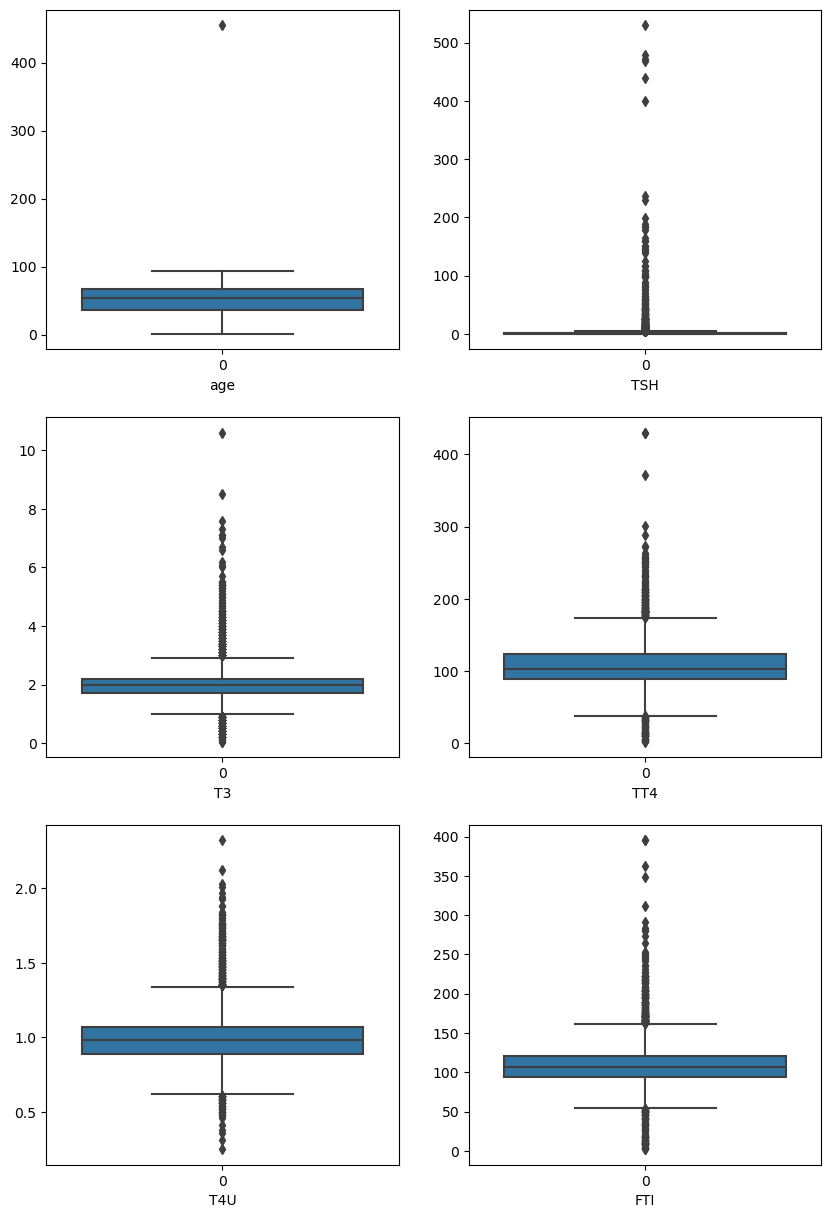

In [387]:
numerical_value_columns = ["age","TSH","T3","TT4","T4U","FTI"]

plt.figure(figsize=(10,15),facecolor='white')
plotnumber = 1

for column in numerical_value_columns:
    ax = plt.subplot(3,2,plotnumber)
    sns.boxplot(data[column])
    plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

**Observation:**<br> Outliers are presents.

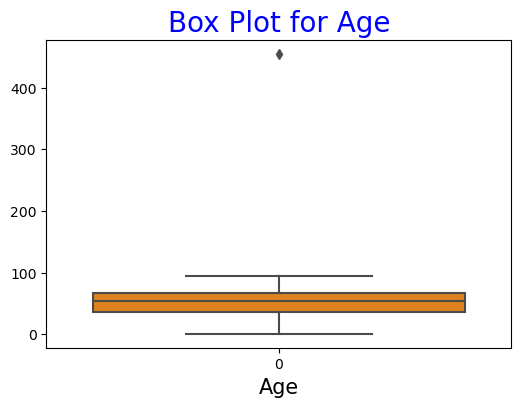

In [388]:
plt.figure(figsize=(6,4))
sns.boxplot(data['age'],color='#fb8500')
plt.title("Box Plot for Age",fontsize=20,color='Blue')
plt.xlabel('Age',fontsize=15)
plt.show()

In [389]:
# need to remove Outlier from Age no one has 455 age
data['age'].describe()

count    3772.000000
mean       51.736479
std        20.082329
min         1.000000
25%        36.000000
50%        54.000000
75%        67.000000
max       455.000000
Name: age, dtype: float64

In [390]:
# Removing Outliers 

Q1 = data['age'].quantile(.25)
Q3 = data['age'].quantile(.75)
IQR = Q3-Q1
lower = Q1 - (1.5 * IQR)
upper = Q3 + (1.5 * IQR)

print("Q1(25%) :",Q1)
print("Q3(75%) :",Q3)
print("IQR :",IQR)
print("Lower :",lower)
print("Upper :",upper)

Q1(25%) : 36.0
Q3(75%) : 67.0
IQR : 31.0
Lower : -10.5
Upper : 113.5


In [391]:
new_data = data[data['age']< upper]

In [392]:
len(data),len(new_data)

(3772, 3771)

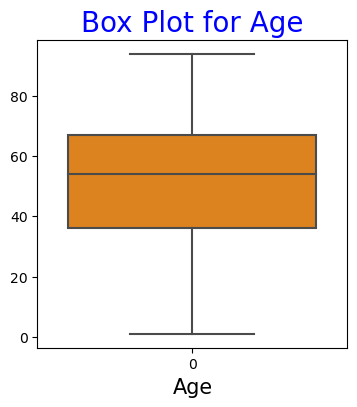

In [393]:
plt.figure(figsize=(4,4))
sns.boxplot(new_data['age'],color='#fb8500')
plt.title("Box Plot for Age",fontsize=20,color='Blue')
plt.xlabel('Age',fontsize=15)
plt.show()

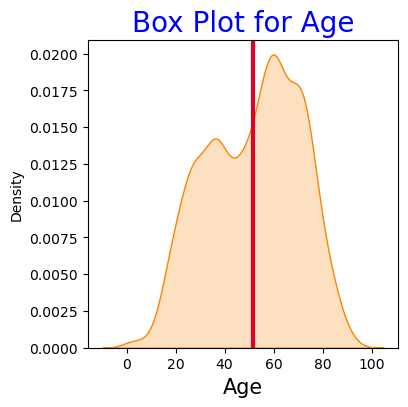

In [394]:
plt.figure(figsize=(4,4))
sns.kdeplot(new_data['age'],color='#fb8500',shade=True)
plt.axvline(new_data['age'].mean(),color='#d90429',linewidth=3)
plt.title("Box Plot for Age",fontsize=20,color='Blue')
plt.xlabel('Age',fontsize=15)
plt.show()

#### Let save the Clean data in .csv file

In [395]:
file_path = 'Clean_dataset.csv'

# Save the DataFrame to a CSV file
new_data.to_csv(file_path, index=False)

### Labelized & Scaling  Feature

In [396]:
data_scale =new_data.copy(deep=True)

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()### For Categorical Feature

In [397]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

### For Categorical Feature

In [398]:
data_scale[cat_col].head()

,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,query hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH measured,T3 measured,TT4 measured,T4U measured,FTI measured,Classes
0,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,t,t,t,t,Negative
1,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,t,t,f,f,Negative
2,M,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,f,t,t,t,Negative
3,F,t,f,f,f,f,f,f,f,f,f,f,f,f,f,t,t,t,f,f,Negative
4,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,t,t,t,t,Negative


### Labelized Categorical Feature

In [399]:
data_scale[cat_col]=data_scale[cat_col].apply(le.fit_transform)

In [400]:
data_scale[cat_col].head()

,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,query hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH measured,T3 measured,TT4 measured,T4U measured,FTI measured,Classes
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,2
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,2
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,2
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,2
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,2


#### Saving Labelized Method

In [401]:
import joblib
joblib.dump(le,'Labelized.lb')

['Labelized.lb']

### For Numerical Feature

In [402]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()

In [403]:
data_scale[num_col].head()

,age,TSH,T3,TT4,T4U,FTI
0,41,1.30,2.5,125.0,1.14,109.0
1,23,4.10,2.0,102.0,0.98,107.0
2,46,0.98,2.0,109.0,0.91,120.0
3,70,0.16,1.9,175.0,0.98,107.0
4,70,0.72,1.2,61.0,0.87,70.0


#### Scalized Numerical Feature

In [404]:
data_scale[num_col] = mm.fit_transform(data_scale[num_col])

In [405]:
#plt.figure(figsize=(25,25))
#sns.heatmap(data_scale.corr(),annot=True);

In [406]:
data_scale.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,query hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH measured,TSH,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,Classes
0,0.430108,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.002443,1,0.232227,1,0.287383,1,0.429952,1,0.272265,2
1,0.236559,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.007726,1,0.184834,1,0.233645,0,0.352657,0,0.267176,2
2,0.483871,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.001840,0,0.184834,1,0.250000,1,0.318841,1,0.300254,2
3,0.741935,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.000292,1,0.175355,1,0.404206,0,0.352657,0,0.267176,2
4,0.741935,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.001349,1,0.109005,1,0.137850,1,0.299517,1,0.173028,2


####  Saving Scalized Method

In [407]:
joblib.dump(mm,'Scalized.scl')

['Scalized.scl']

## Save Scaled Thyroid Data to CSV

In [408]:
data_scale.to_csv('Scaled Thyroid Data.csv',index=False)

In [409]:
#plt.figure(figsize=(25,25))
#sns.heatmap(data_scale.corr()>0.45,annot=True);

# Feature Selection

#### Dataset for Machine learning Model

In [410]:
ML_data = data_scale.drop(columns=['on thyroxine', 'query on thyroxine', 'on antithyroid medication',
       'sick', 'pregnant', 'thyroid surgery', 'I131 treatment',
       'query hypothyroid', 'query hyperthyroid', 'lithium', 'goitre', 'tumor',
       'hypopituitary', 'psych'])

In [411]:
ML_data

,age,sex,TSH measured,TSH,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,Classes
0,0.430108,0,1,0.002443,1,0.232227,1,0.287383,1,0.429952,1,0.272265,2
1,0.236559,0,1,0.007726,1,0.184834,1,0.233645,0,0.352657,0,0.267176,2
2,0.483871,1,1,0.001840,0,0.184834,1,0.250000,1,0.318841,1,0.300254,2
3,0.741935,0,1,0.000292,1,0.175355,1,0.404206,0,0.352657,0,0.267176,2
4,0.741935,0,1,0.001349,1,0.109005,1,0.137850,1,0.299517,1,0.173028,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,0.311828,0,0,0.002632,0,0.184834,0,0.235981,0,0.352657,0,0.267176,2
3768,0.720430,0,1,0.001877,1,0.194313,1,0.285047,1,0.400966,1,0.284987,2
3769,0.784946,0,1,0.009613,1,0.165877,1,0.257009,1,0.396135,1,0.262087,2
3770,0.763441,1,1,0.001311,1,0.184834,1,0.186916,1,0.333333,1,0.216285,2


In [412]:
ML_data.to_csv("ML_Thyroid Detection data.csv",index=False)